### importing libraries

In [1]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors # the LogNorm() method used to add a logscale on heatmap colorbar
import seaborn as sns
import plotly.express as px

## Step 1 :- Problem Statement


- We are given a dataset containing information about all the sales of an E-Commerce site in the diwali period
- We have to perform EDA over it and draw some conclusion

## Step 2 :- Data Cleaning

In [2]:
# import csv file 

df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

In [3]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


#### 1. Summary of data.

- the dataset is of an online shopping website, where sales of all porduct is given
- the dataset contains 11251 rows and 15 columns.


#### 2. Write columns description.

1. `User_ID` - the unique identifier for all user's who are registered in website
2. `Cust_name` - name of customer.
3. `Product_ID` - unique id for each category of product.
4. `Gender` - gender of customer.
5. `Age Group` - age group in which customer belongs to.
6. `Age` - age of customer.
7. `Maritial_Status` - Maritial status of customer. where "0" is unmarried and "1" is married.
8. `State` - state of India from where customer belongs.
9. `Zone` - zone of India.
10. `Occupation` - occupation of customer/ sector in which customer works.
11. `Product_Category` - category where product is been used.
12. `Orders` - items ordered in an order.
13. `Amount` - amount of shopping customer had purchased in rupees.
14. `Status` -
15. `unnamed1` -

### Manual Assesment

#### issues with dataset:

1. Dirty data    
    - `Product_ID` - at some places product_id is of 7 characters
      
2. Messy data
    - `Status` - col contains NaN values
    - `unnamed1` - col contains NaN values, so it is useless, we can drop it

In [4]:
df.sample(60)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
10420,1004018,Parna,P00346142,M,46-50,47,1,Uttar Pradesh,Central,Hospitality,Pet Care,2,2846.0,NaN,NaN
8936,1002600,Grady,P00153442,F,26-35,33,0,Maharashtra,Western,Aviation,Clothing & Apparel,1,5205.0,NaN,NaN
4510,1002795,McMath,P00275842,F,51-55,55,0,Bihar,Eastern,Banking,Electronics & Gadgets,2,9786.0,NaN,NaN
7273,1002092,Shivangi,P00271142,F,55+,83,1,Kerala,Southern,Lawyer,Clothing & Apparel,2,7008.0,NaN,NaN
2366,1003558,Irene,P00223842,F,18-25,20,1,Haryana,Northern,Banking,Food,4,15226.0,NaN,NaN
5828,1001577,Fein,P00262242,M,55+,64,0,Andhra Pradesh,Southern,Media,Electronics & Gadgets,3,8041.0,NaN,NaN
2798,1005113,Overfelt,P00121642,F,26-35,28,0,Delhi,Central,Aviation,Footwear & Shoes,3,12704.0,NaN,NaN
2897,1004062,Gordon,P00151742,M,26-35,26,0,Maharashtra,Western,IT Sector,Furniture,3,12505.0,NaN,NaN
282,1001218,Jaideep,P00118542,M,55+,79,0,Madhya Pradesh,Central,Food Processing,Footwear & Shoes,4,20424.0,NaN,NaN
10772,1004352,Herman,P00006942,F,18-25,22,0,Gujarat,Western,IT Sector,Electronics & Gadgets,1,1964.0,NaN,NaN


### Programatic/Automatic Assesment

#### issues with dataset:

1. Dirty data
    - `Amount` - col contains 12 NaN values
    - `Status` - col contains all NaN values
    - `unnamed1` - col contains all NaN values
2. Messy data
    - same customer id has different ages and maritial status, probably their age is increasing and they got married,
    - their state & zones are changing,
    - their occupation are changing
    - at some places same customer_id has different gender 
     
    

In [5]:
# status and unnamed column contains 0 non-null values, so they are useless, we can drop them

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(columns=['Status', 'unnamed1'], inplace=True)

In [7]:
# df[df.Amount.isnull()]

# fill those rows with mean of Amount
df['Amount'].fillna(df['Amount'].mean(), inplace=True)

In [8]:
# df.duplicated().sum()     # 8 rows are duplicated
df[df.duplicated()]         # visualize the row
 
# df.drop_duplicates(inplace=True)     # 8 duplicates rows dropped

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0
4404,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0
5703,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0
6173,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0
8651,1000083,Gute,P00242842,M,26-35,35,0,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3,5345.0
8941,1001476,Anudeep,P00036842,M,18-25,25,0,Maharashtra,Western,IT Sector,Clothing & Apparel,4,5202.0
10571,1004404,Rittenbach,P00150142,F,26-35,28,1,Haryana,Northern,Aviation,Electronics & Gadgets,3,2304.0


In [9]:
 # same customer id 1004725 has different gender at index 335 and 10795

# df.query('User_ID == 1004725')  # fill it with its maximum gender occurence

df.loc[[335, 10795], 'Gender'] = 'F'

In [10]:
# check for the customers who has both maritial status married 1 and unmarried 0
gr = df.groupby('User_ID')['Marital_Status'].apply(set)
both = gr[gr.apply(set).apply(lambda x: len(x) >1)].index

# this data is not accurate so making conclusion based on this column will not be beneficial.
df[df['User_ID'].isin(both)].sort_values('User_ID')

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
4048,1000004,Guthrie,P00318742,F,46-50,47,1,Uttar Pradesh,Central,Construction,Decor,2,10072.0
323,1000004,Guthrie,P00184942,F,46-50,47,0,Madhya Pradesh,Central,Retail,Footwear & Shoes,1,20309.0
3851,1000008,Andy,P00165942,F,26-35,28,0,Maharashtra,Western,Healthcare,Sports Products,4,10996.0
2715,1000008,Andy,P00297042,F,26-35,29,0,Delhi,Central,Food Processing,Footwear & Shoes,3,12837.0
5165,1000008,Andy,P00010742,F,26-35,27,1,Punjab,Northern,Automobile,Clothing & Apparel,4,8642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8201,1006039,Harry,P00035542,M,46-50,48,0,Andhra Pradesh,Southern,Hospitality,Electronics & Gadgets,3,5914.0
2487,1006040,Pond,P00211242,F,26-35,27,0,Bihar,Eastern,Media,Sports Products,1,13557.0
83,1006040,Pond,P00271242,F,26-35,28,1,Delhi,Central,IT Sector,Footwear & Shoes,1,20960.0
255,1006040,Pond,P00111142,F,26-35,27,0,Karnataka,Southern,Food Processing,Footwear & Shoes,2,20488.0


In [11]:
# max age is 92 which can be an outlier 
# 42% customers are married
# approximately each customer orders 2.5 items in an order

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5219.569870
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## Step 3 :- EDA 

### Step - 1 : Columns types

- **Numerical Columns** - `User_ID`, `Age`, `Orders`, `Amount`
- **Categorical Columns** - `Gender`, `Age Group`, `Maritial_Status`, `State`, `Zone`, `Occupation`, `Food`
- **Mixed Columns** - `Product_ID`
- **Object Columns** - `Cust_name`

### Step - 2 : Univariate Analysis 

In [12]:
# Descriptive Statistics -> checking central tendencies & dispersion
df.describe() 

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5219.569870
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


#### Age

**Conclusion**

- the age density plot is positively skewed.
- majority of customer comes from 20-50 age group.
- 283 customers have age more than maximum.

<Axes: ylabel='Frequency'>

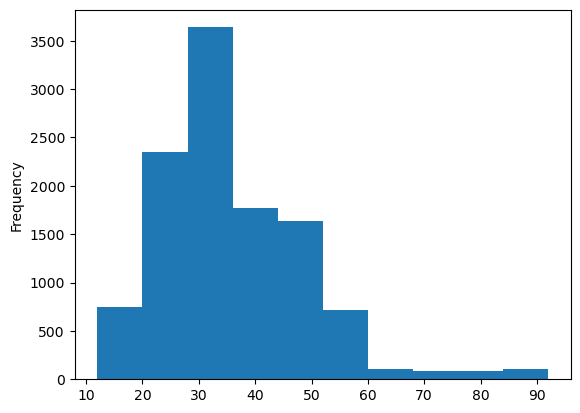

In [13]:
# visualizations -> histogram -> checking frequency distribution

df['Age'].plot(kind='hist')

<Axes: ylabel='Density'>

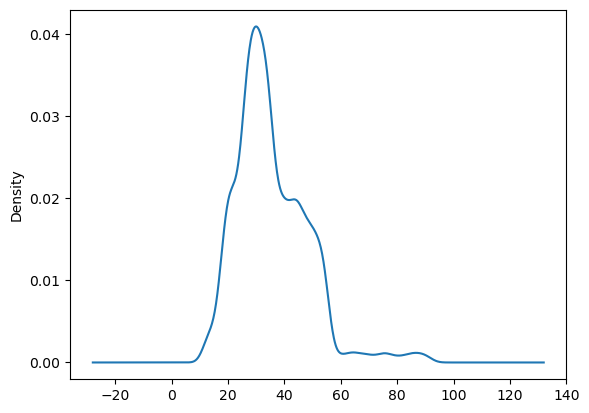

In [14]:
# visualizations -> kernel density estimation -> checking skewness and density

df['Age'].plot(kind='kde')

<Axes: >

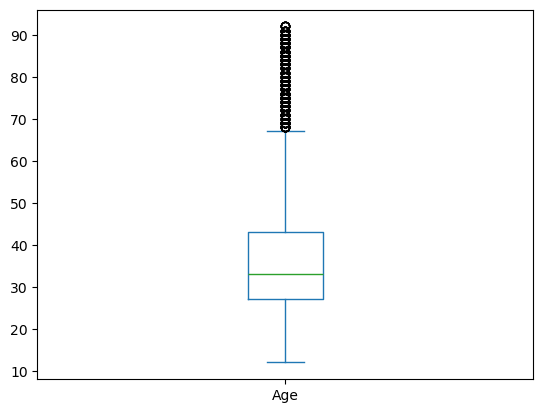

In [15]:
# visualizations -> box plot -> detecting outliers

df['Age'].plot(kind='box')   # here we can see that, there are some outliers we can check it below

In [16]:
# checking outliers 
# outliers are those that are 1.5 times interquartile range in addition to 25th & 75th percentile
# here 25th percentile is 27 and 75th percentile is 43 hence iqr will be 16
# hence outliers are (1.5 X 16) + 43 = 67
# therefore we're checking ages greater than 67

df[df['Age'] > 67]    # here 283 customers are outliers

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
24,1000900,Skaria,P00317842,M,55+,83,0,Karnataka,Southern,Automobile,Auto,3,23513.0
38,1002520,Mike,P00310342,M,55+,72,1,Himachal Pradesh,Northern,Media,Auto,4,23267.0
197,1001736,Martinez,P00227942,M,55+,72,1,Uttar Pradesh,Central,Textile,Footwear & Shoes,2,20603.0
234,1002201,Dodson,P00127642,F,55+,83,1,Madhya Pradesh,Central,Govt,Furniture,1,20533.0
275,1002760,McClure,P00101842,M,55+,77,1,Kerala,Southern,Lawyer,Footwear & Shoes,4,20440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11107,1002111,Vipul,P00120142,F,55+,85,0,Delhi,Central,IT Sector,Office,1,954.0
11125,1002634,Gross,P00073642,F,55+,76,0,Delhi,Central,Automobile,Office,2,931.0
11148,1002002,Maureen,P00177442,M,55+,89,0,Telangana,Southern,Healthcare,Office,1,777.0
11162,1005223,Nandita,P00059642,F,55+,69,0,Delhi,Central,IT Sector,Office,4,766.0


#### Orders

**conclusion** 

- number of order per user is equally/uniformly distributed with mean order per user


<Axes: ylabel='Frequency'>

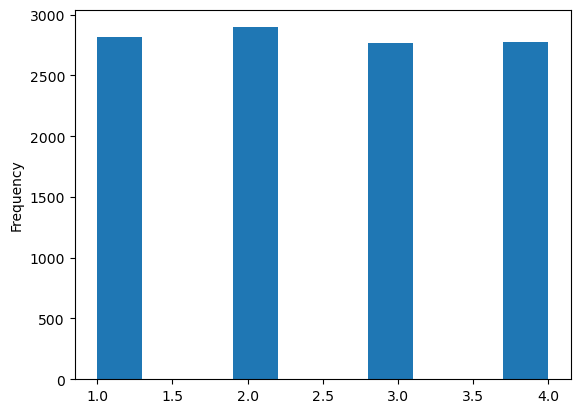

In [17]:
# visualization -> histogram

df['Orders'].plot(kind='hist') # all bars same height determines that average user orders 2.5 orders per order

#### Amount

**conclusion** 

- most of the orders comes in the range of 5k to 15k

<Axes: ylabel='Frequency'>

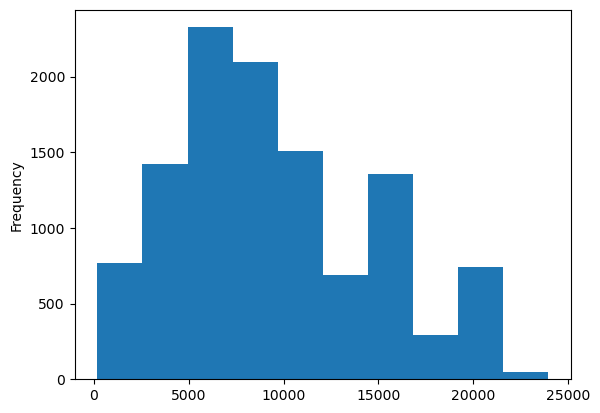

In [18]:
df['Amount'].plot(kind='hist')

<Axes: ylabel='Density'>

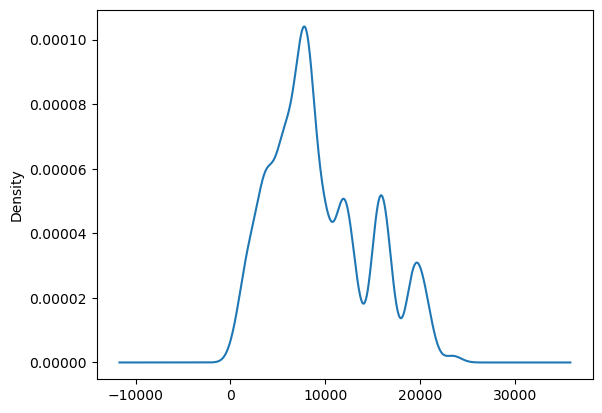

In [19]:
df['Amount'].plot(kind='kde')

<Axes: >

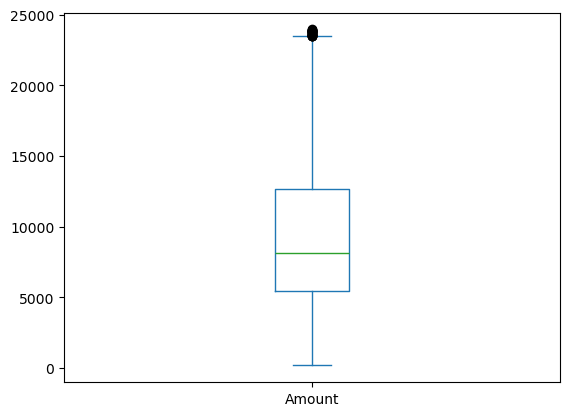

In [20]:
df['Amount'].plot(kind='box')

#### Gender

**conclusion** 

- Almost 70% customers are females

<Axes: ylabel='count'>

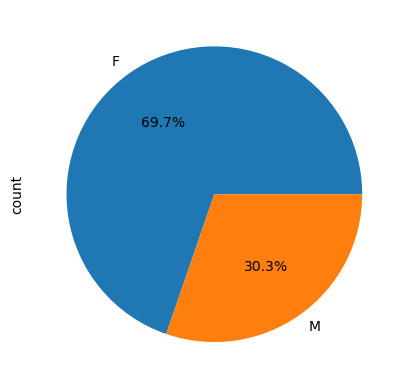

In [21]:
# visualization -> percentage male and female customers

df['Gender'].value_counts().plot(kind='pie', autopct='%0.1f%%')

#### Age group

**conclusion** 

- more than 75% customers are belong to age group of 18 to 45.

<Axes: ylabel='count'>

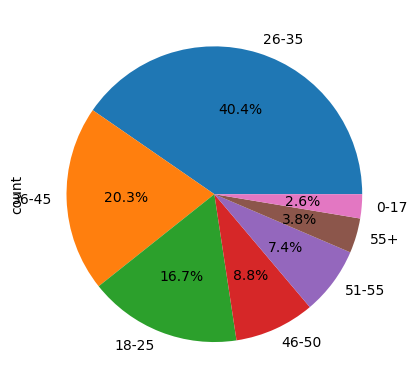

In [22]:
# visualization -> percentage age group wise customers

df['Age Group'].value_counts().plot(kind='pie', autopct='%0.1f%%')

#### Marital_status

**conclusion** 

- 58% of customers are unmarried.

<Axes: ylabel='count'>

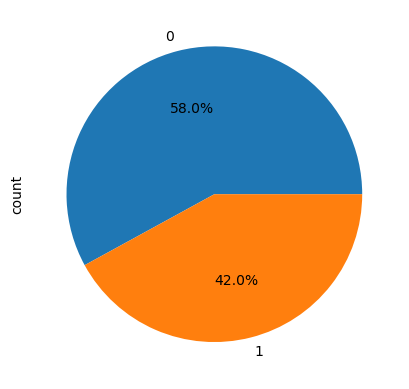

In [23]:
# visualization -> percentage married and unmarried customers

df['Marital_Status'].value_counts().plot(kind='pie', autopct='%0.1f%%')

#### State

**conclusion** 

- 4 states contributing more than 50% of customers

<Axes: ylabel='count'>

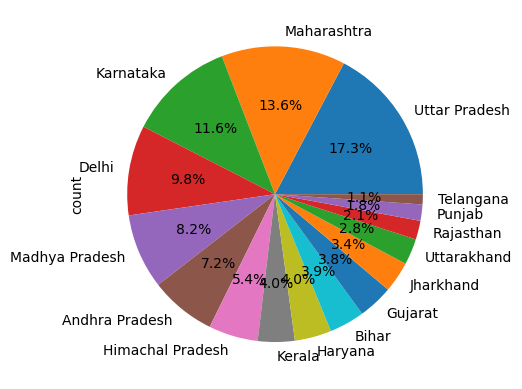

In [24]:
# visualization -> percentage customers from each states

df['State'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

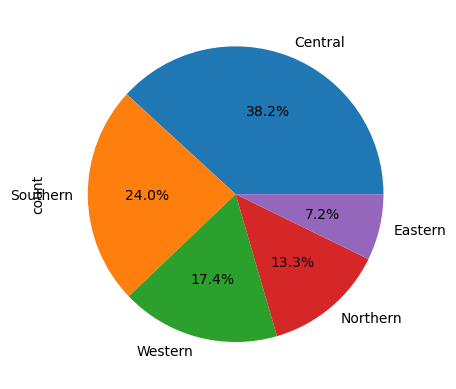

In [25]:
# visualization -> percentage customers from each zones

df['Zone'].value_counts().plot(kind='pie', autopct='%0.1f%%')

#### Occupation

<Axes: ylabel='count'>

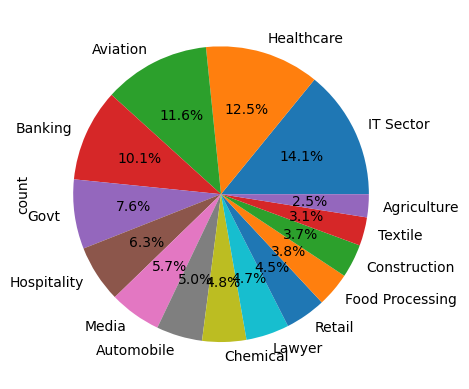

In [26]:
# visualization -> percentage occupation of each customers 

df['Occupation'].value_counts().plot(kind='pie', autopct='%0.1f%%')

### Product Category

**conclusion** 

- Almost 75% sale is comes from 4 major categories that are colthing, food, electronics & footware

<Axes: ylabel='count'>

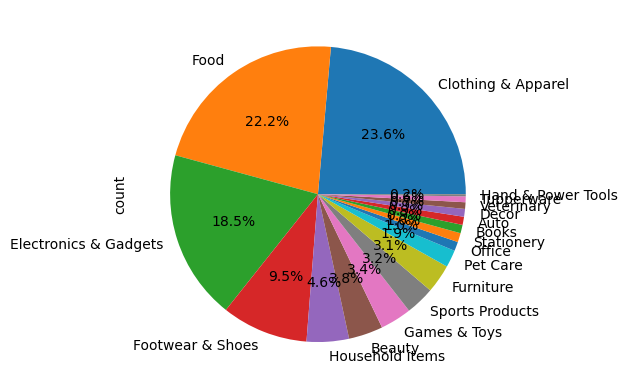

In [27]:
df['Product_Category'].value_counts().plot(kind='pie', autopct='%0.1f%%')

### Step - 3 : Bivariate Analysis 
**conclusion**
- food category of product has highest contribution to revenue.
- followed by clothing & apparel, Electronics & Gadgets and Footwear & shoes 

#### Product sales vs Revenue generated


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Food'),
  Text(1, 0, 'Clothing & Apparel'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Games & Toys'),
  Text(6, 0, 'Sports Products'),
  Text(7, 0, 'Auto'),
  Text(8, 0, 'Beauty'),
  Text(9, 0, 'Stationery'),
  Text(10, 0, 'Household items'),
  Text(11, 0, 'Tupperware'),
  Text(12, 0, 'Books'),
  Text(13, 0, 'Decor'),
  Text(14, 0, 'Pet Care'),
  Text(15, 0, 'Hand & Power Tools'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

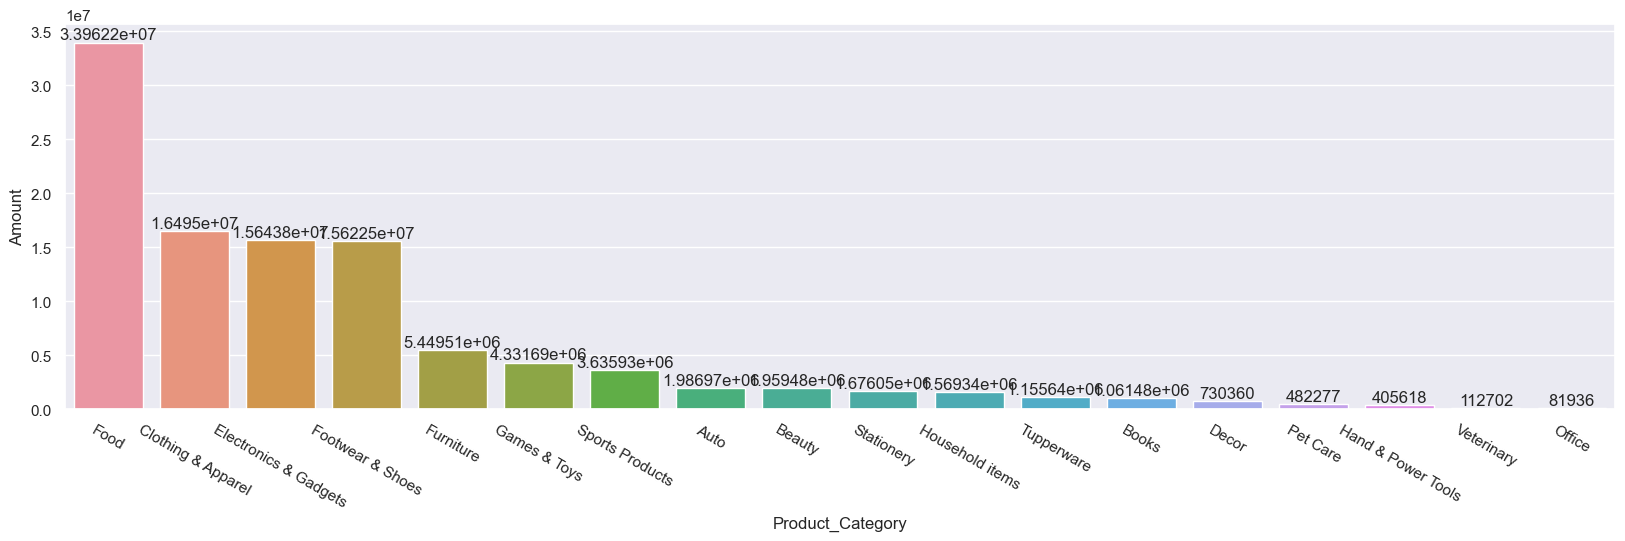

In [28]:
pro_amo = df.groupby('Product_Category', as_index=False)['Amount'].sum().sort_values('Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data=pro_amo, x='Product_Category', y='Amount')

for bar in ax.containers:
    ax.bar_label(bar)
    
plt.xticks(rotation=330)

([<matplotlib.patches.Wedge at 0x1e741eebf10>,
 [Text(0.5914320150169337, 0.9274740813699377, 'Food'),
  Text(-0.8769392707761303, 0.6640613792192924, 'Clothing & Apparel'),
  Text(-1.050495733673393, -0.32628011513728483, 'Electronics & Gadgets'),
  Text(-0.3732010488532878, -1.0347564820453197, 'Footwear & Shoes'),
  Text(0.3000256057390651, -1.058293265546421, 'Furniture'),
  Text(0.5891009725335775, -0.9289564274819316, 'Games & Toys'),
  Text(0.7894682334323544, -0.7659894962734135, 'Sports Products'),
  Text(0.9052380139365335, -0.6249353071512608, 'Auto'),
  Text(0.9717757927720247, -0.5154142106910742, 'Beauty'),
  Text(1.0214181481719353, -0.4082951953979064, 'Stationery'),
  Text(1.055807363645839, -0.3086597007567126, 'Household items'),
  Text(1.0772055808900327, -0.22277373386323512, 'Tupperware'),
  Text(1.089474829330128, -0.15180446718093943, 'Books'),
  Text(1.095979834206279, -0.09395851751266159, 'Decor'),
  Text(1.098641520993951, -0.05465170032211077, 'Pet Care'),


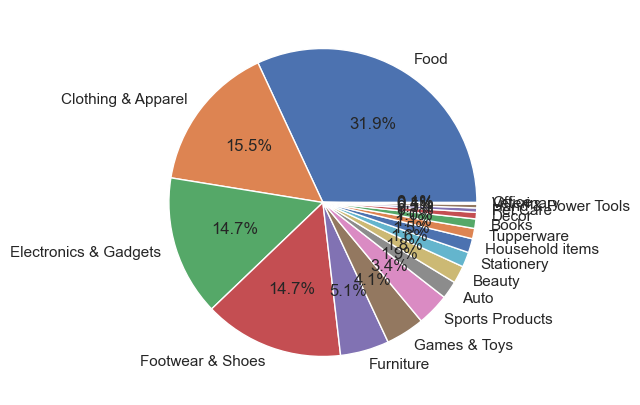

In [29]:
plt.pie(pro_amo.Amount, labels=pro_amo.Product_Category, autopct='%0.1f%%')

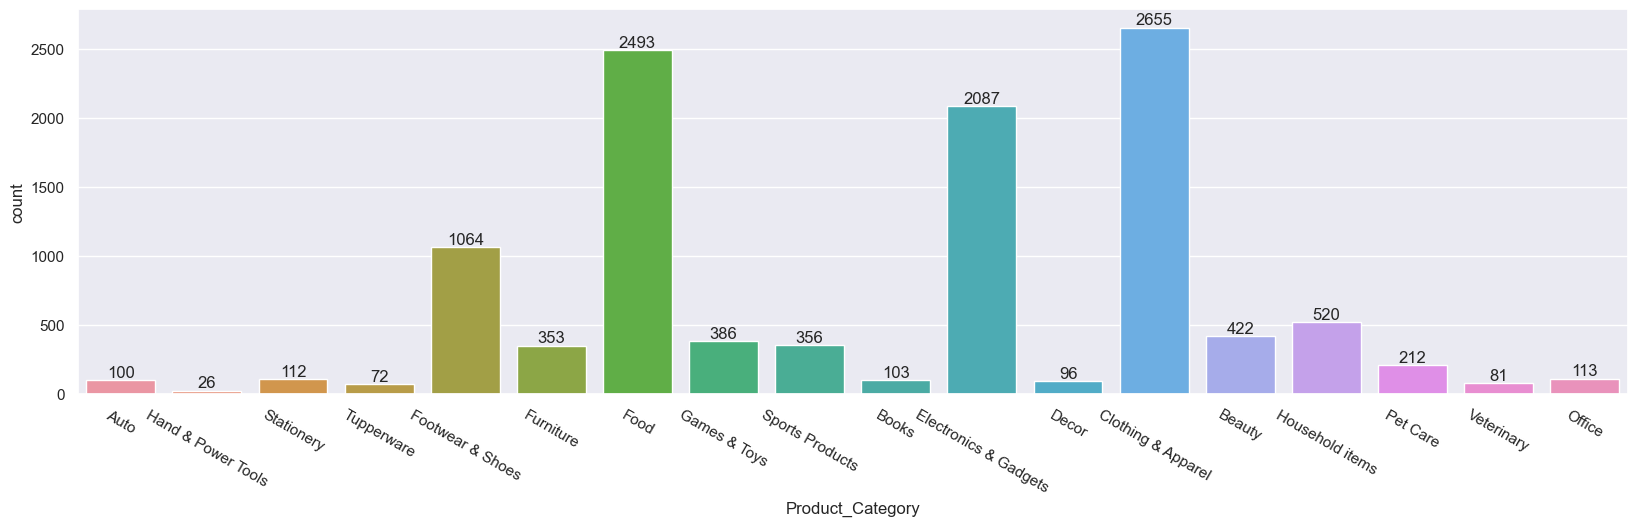

In [30]:
ax = sns.countplot(data=df, x='Product_Category')
plt.xticks(rotation=330)

for bar in ax.containers:
    ax.bar_label(bar)

from the above two charts we can say that, most of the revenue is coming from food category even though it's sales is less than clothing.

#### Occupation category vs Revenue generated

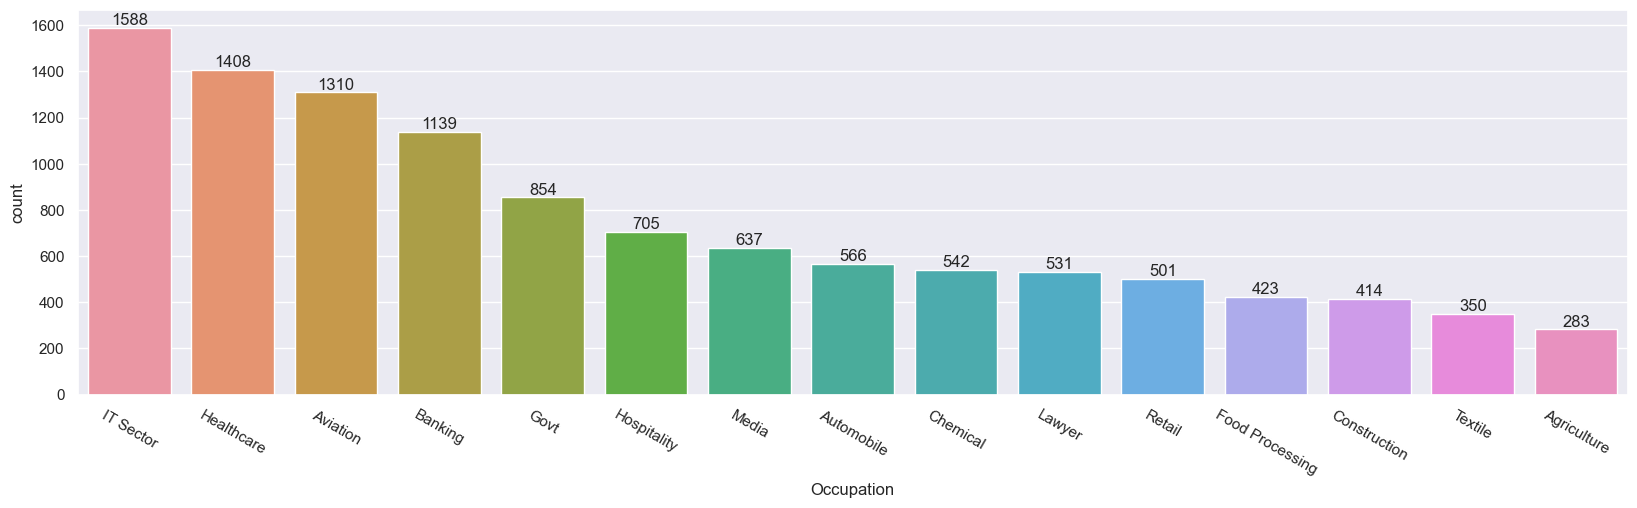

In [31]:
ax = sns.countplot(data=df, x='Occupation', order=df['Occupation'].value_counts().index)
plt.xticks(rotation=330)

for bar in ax.containers:
    ax.bar_label(bar)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'IT Sector'),
  Text(1, 0, 'Healthcare'),
  Text(2, 0, 'Aviation'),
  Text(3, 0, 'Banking'),
  Text(4, 0, 'Govt'),
  Text(5, 0, 'Hospitality'),
  Text(6, 0, 'Media'),
  Text(7, 0, 'Automobile'),
  Text(8, 0, 'Chemical'),
  Text(9, 0, 'Lawyer'),
  Text(10, 0, 'Retail'),
  Text(11, 0, 'Food Processing'),
  Text(12, 0, 'Construction'),
  Text(13, 0, 'Textile'),
  Text(14, 0, 'Agriculture')])

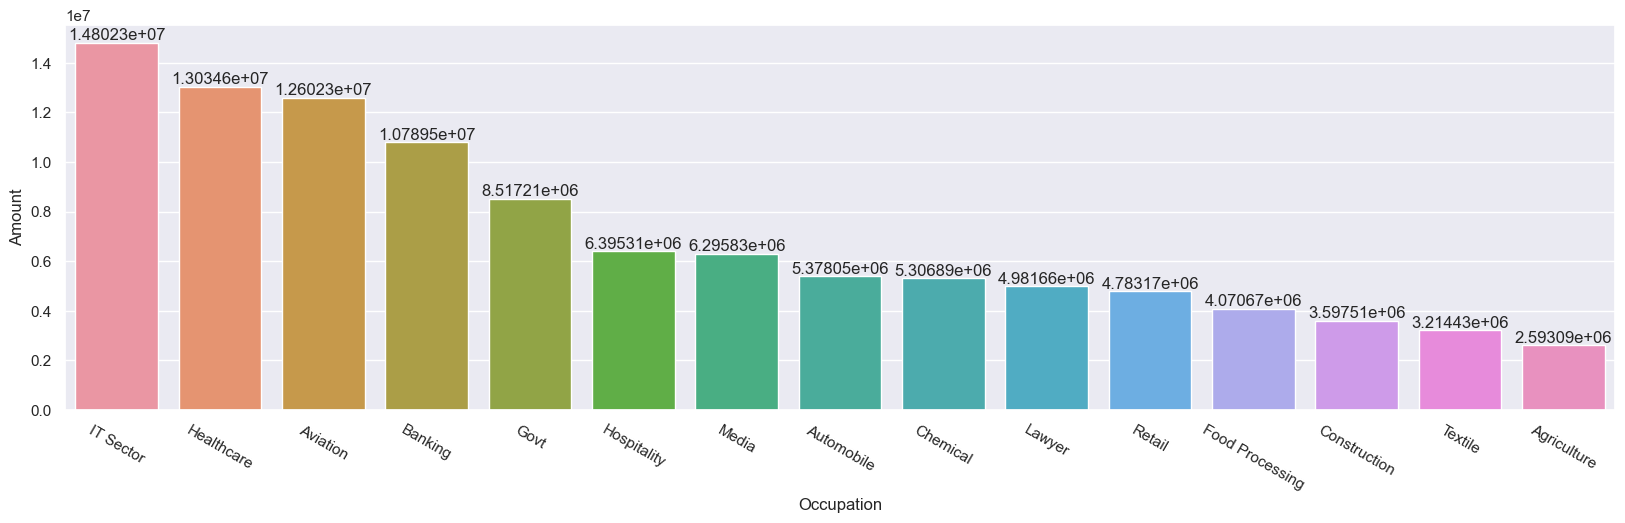

In [32]:
occ_amo = df.groupby('Occupation', as_index=False)['Amount'].sum().sort_values('Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data=occ_amo, x='Occupation', y='Amount')

for bar in ax.containers:
    ax.bar_label(bar)
    
plt.xticks(rotation=330)

from the above two graphs we can conclued that occupation category to revenue generated ratio is constant as per the shopping done by customers of each category.

In [33]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### columns on which bivariate analysis is done



#### Age group & Product_category
**conclusion**
- footware category of products are less likely to buy by the customer whose age is less than 25  
- pet care products are most likely to buy by customers belongs to 46-50 age group
- household items most likely to purchased by customers belongs to 26-35 age group compared to other age groups


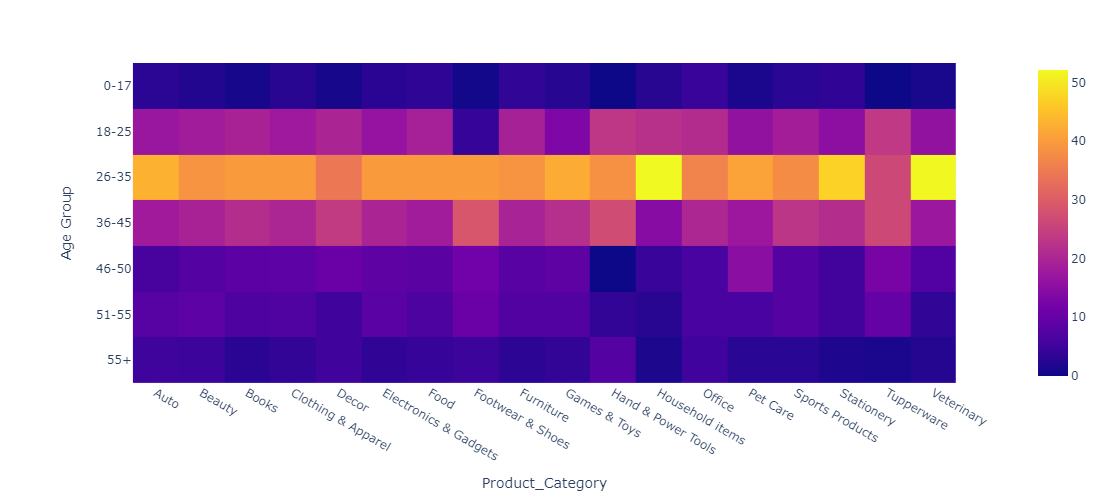

In [76]:
# percentage products category wise
fig = px.imshow(pd.crosstab(df['Age Group'], df['Product_Category'], normalize='columns')*100)
fig.update_layout(autosize=False,width=1000,height=500)

#### Gender & Product category

- mojor purchases among males are books, hand & power tools, household items, furniture and stationary products
- major purchases among females are beauty, decor, veterinary

This can be seen better when we hover over each block

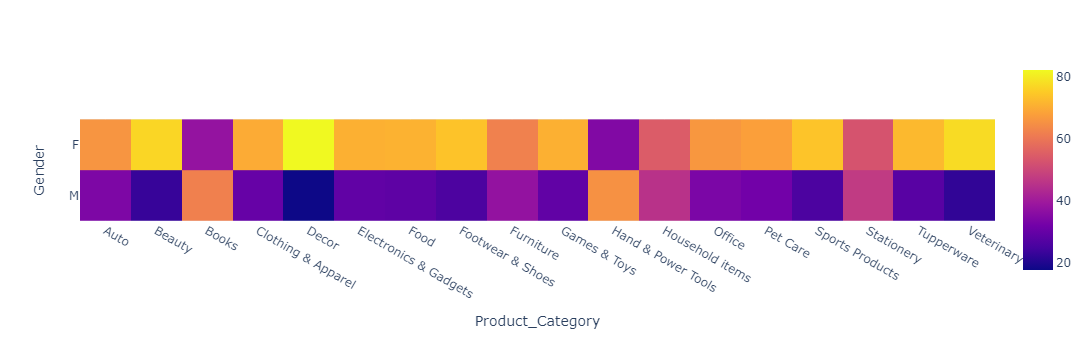

In [81]:
# category wise purchases among customer's gender

fig = px.imshow(pd.crosstab(df['Gender'], df['Product_Category'], normalize='columns')*100)
fig.show()

#### Occupation & Product_category

- books are more purchased by aviation
- hand and power tools are more purchased by banking & it 
- sports products are more purchased by healthcare
- decor items more purchased by banking and IT

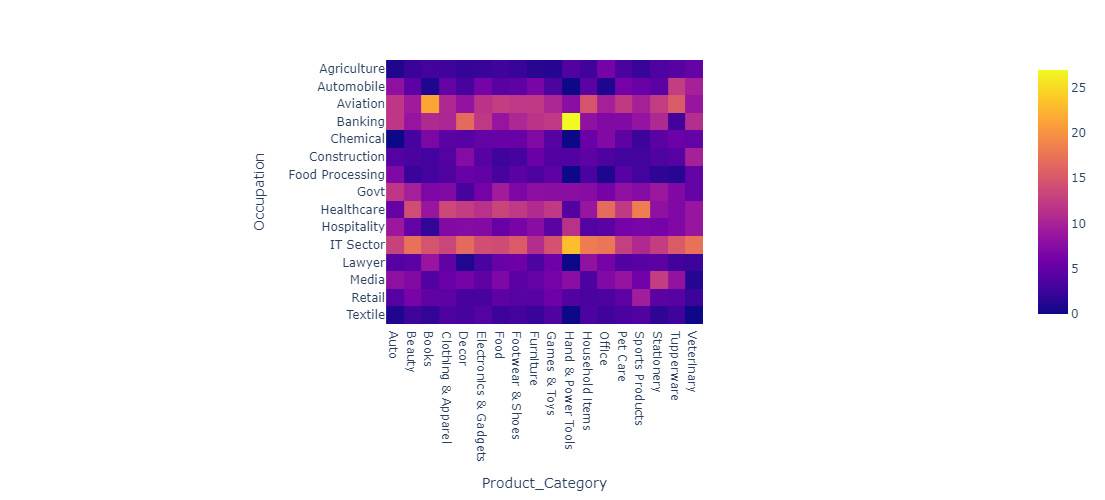

In [84]:
fig = px.imshow(pd.crosstab(df['Occupation'], df['Product_Category'], normalize='columns')*100)
fig.update_layout(autosize=False,width=1000,height=500)

### Step - 3 : Multivariate Analysis 

Text(0.5, 1.0, 'Amount spending by each age group on each product')

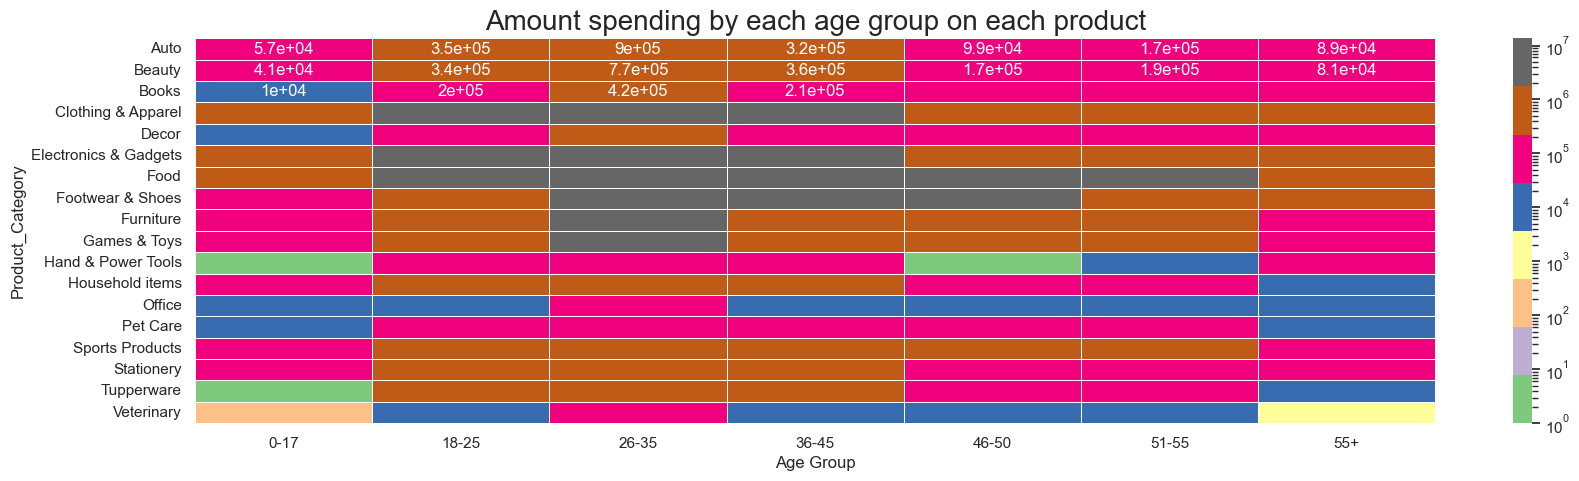

In [86]:
# amount of spending of each age group on each category of product

pt = df.pivot_table(index='Product_Category', columns='Age Group', values='Amount', aggfunc='sum', fill_value=1)
# if we fill the value with "0" then plot gives a blank spot, so we replace it with 1

sns.heatmap(pt, linewidth=0.5, cmap='Accent', annot=True, norm=colors.LogNorm(),vmin=pt.min(), vmax=pt.max())
plt.title('Amount spending by each age group on each product', fontdict={'fontsize': 20})

# pt = df.pivot_table(index='Age Group', columns='Product_Category', values='Amount', aggfunc='sum', fill_value=1)
# fig = px.imshow(pt)# -> using plotly
# fig.update_layout(autosize=False,width=1000,height=500,)

# more the color is on upper side more revenue is generating for that category of product from matching age group

# Step 4 :- Conclusion

- most of the revenue is coming from 4 major categories- food, clothing, electronics and footwear - 77%
- most of the sales is coming from - clothing, food, electronics and footwear > 73%
- most buyers are from - it, healthcare, aviation, banking > 48%
- major buyers are females > 69%
- most of buyers are married = 58%
- major buyers from 18-45 age group > 77%
- most sales is coming from - UP, maharashtra, karnataka, delhi > 52%
- most salse is comig from - central, southern and western > 79%
<br></br>
- from the above two charts we can say that, most of the revenue is coming from food category even though it's sales is less than clothing.
<br></br>
- footwear have less sale when customer age is less than 25
- 46-50 customers have more sales in pet care category
- 35 customers have more sales in household items
<br></br>
- mojor purchases among males are books, hand & power tools, household items, furniture and stationary products
- major purchases among females are beauty, decor, veterinary
<br></br>
- books are more purchased by aviation
- hand and power tools are more purchased by banking & it 
- sports products are more purchased by healthcare
- stationary items are more purchased by retail
- decor items more purchased by banking

##### most of the revenue is generating from married female between 26-35 age group who works in it, healthcare, aviation, banking sectors and buying food, clothing, electronics and footwear category of products in states of UP, maharashtra, karnataka, delhi